# Wednesday Protein Engineering Validation 

Case: Protein engineering functinal mapping problems used for validating results found using the Wednesday Noisy-ML Simualtion framework regarding the interplay between noise in measuremenets, their quality and modeling performance. 

Part of a paper submission: The Invisible Performance of Regression Models on Noisy Measurements

Author: Fatma-Elzahraa Eid, Broad Institute of MIT and Harvard

In [1]:
import os 
import pandas as pd
import numpy as np 
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import seaborn as sns
import ast

-----


# Part 1: Invisible Performance, True Performance and near-True Quality

In [2]:
# [1] Data 

# Define the folder path
folder_path = 'example results'

# Training results and quality measures 
replication_df = pd.read_csv(os.path.join(folder_path,'AAV_Replicability.csv'))
performance_df = pd.read_csv(os.path.join(folder_path,'AAV_Training_differentQuality.csv'))

quality_df = pd.read_csv(os.path.join(folder_path,'AAV_ProductionFitness_EstimatedQuality.csv'))

In [3]:
# [2] Preparing data for plotting

# Average rounds of train-testing for each setting
performance_df['R_test_independent_mean'] = [np.mean(ast.literal_eval(N))
                                             for N in performance_df.R_test_independent]

# Ensure all data is in a long format for seaborn plotting
data_long_2 = pd.concat([
    performance_df[['R_test_independent_mean', 'replicates_count']].rename(columns={'R_test_independent_mean': 'Value', 'replicates_count': 'k'}).assign(Metric='Observed performance'),
    performance_df[['R_testHQ', 'replicates_count']].rename(columns={'R_testHQ': 'Value', 'replicates_count': 'k'}).assign(Metric='True Performance')
])

# Prepare Quality data for plotting
quality_avg_df = quality_df.groupby('k').Quality.agg(['mean', 'std']).reset_index().rename(columns={'mean': 'Value', 'std': 'Error'})
quality_avg_df['Metric'] = 'Quality'

# Append the Quality data to the existing data
data_long_2 = pd.concat([data_long_2, quality_avg_df[['k', 'Value', 'Metric']]])



/var/folders/wr/s8rzvznx04jbsmd65qt7v27r0000gq/T/ipykernel_59758/2697520318.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/var/folders/wr/s8rzvznx04jbsmd65qt7v27r0000gq/T/ipykernel_59758/2697520318.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(x='k', y='Value', hue='Metric', data=data_long_2, palette=custom_palette, ci='sd')


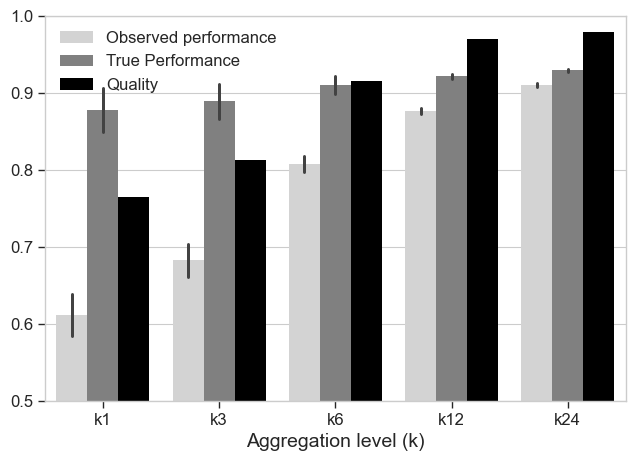

In [4]:
# [3] Plotting 

plt.style.use('seaborn-whitegrid')
sns.set_context("paper", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14})  # Adjust to match Nature's requirements

#plt.figure(figsize=(5, 5))
plt.figure(figsize=(7.5, 5))

# Create a custom palette with gray and black colors
custom_palette = {'Observed performance': '#d3d3d3', 'True Performance': 'gray', 'Quality': 'black'}

ax = sns.barplot(x='k', y='Value', hue='Metric', data=data_long_2, palette=custom_palette, ci='sd')

# Increase the tick label font sizes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.ylim(0.5, 1)
plt.xlabel('Aggregation level (k)')
plt.ylabel('')
plt.legend(title='', loc='upper left', fontsize=12)

plt.savefig('results/ProteinEngieering_TruePerInvisiblePerQuality.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ProteinEngieering_TruePerInvisiblePerQuality.svg', dpi=300, bbox_inches='tight')

plt.show()


-----

# Part 2: Data Quality Caps Observed Performance

In [5]:
# [1] Collecting optimized performance and replicability manually from Fit4Function paper figures


POP = pd.DataFrame(columns=['Assay', 'Replication', 'Performance', 'Type'])

# Function for adding a new row to the tracking dataframe 
def add_row(df, row_data):
    new_row = pd.DataFrame([row_data])
    return pd.concat([df, new_row], ignore_index=True)

# Part 1: Production 
# From Figures 2d and 2f
POP = add_row(POP, {'Assay':'Production', 'Replication'  : 0.93, 'Performance': 0.916, 'Type': 'in vitro'})

#Part 2: Biodistribution to mouse organs 
# From Figures 3e and 3f 
POP = add_row(POP, {'Assay':'Serum', 'Replication' : 0.769025183227536, 'Performance': 0.69, 'Type': 'in vivo'})
POP = add_row(POP, {'Assay':'Liver', 'Replication' : 0.8412781351188493, 'Performance': 0.82, 'Type': 'in vivo'})
POP = add_row(POP, {'Assay':'Spleen', 'Replication': 0.8181000031748206, 'Performance': 0.74, 'Type': 'in vivo'})
POP = add_row(POP, {'Assay':'Kidney', 'Replication': 0.762720794717358, 'Performance': 0.71, 'Type': 'in vivo'})
POP = add_row(POP, {'Assay':'Heart', 'Replication' : 0.5287679418704497, 'Performance': 0.62, 'Type': 'in vivo'})
POP = add_row(POP, {'Assay':'Lung', 'Replication'  : 0.4572556146019459, 'Performance': 0.58, 'Type': 'in vivo'})
POP = add_row(POP, {'Assay':'Spinal Cord', 'Replication'  : 0.6686892071967098, 'Performance': 0.65, 'Type': 'in vivo'})
POP = add_row(POP, {'Assay':'Brain', 'Replication'  : 0.5899829146341924, 'Performance': 0.61, 'Type': 'in vivo'})


# Part 3: in vitro assays
# From Figures 3c and 3d 
POP = add_row(POP, {'Assay':'HEK293 (binding)', 'Replication' : 0.8431780428300315, 'Performance': 0.74, 'Type': 'in vitro'})
POP = add_row(POP, {'Assay':'hCMEC/D3 (binding)', 'Replication' : 0.8940578875074517, 'Performance': 0.84, 'Type': 'in vitro'})
POP = add_row(POP, {'Assay':'mBMVEC (binding)', 'Replication' : 0.8573442253968708, 'Performance': 0.84, 'Type': 'in vitro'})
POP = add_row(POP, {'Assay':'hBMVEC (binding)', 'Replication' : 0.8879119321276409, 'Performance': 0.82, 'Type': 'in vitro'})
POP = add_row(POP, {'Assay':'HEK293 (transduction)', 'Replication' : 0.8962776352688889, 'Performance': 0.83, 'Type': 'in vitro'})

# Part 4: Another set of in vitro assays 
# From Supplementary Figure 5 and Figure 4a
POP = add_row(POP, {'Assay':'HEPG2 (binding)', 'Replication' : np.mean([0.83, 0.83, 0.82]), 'Performance': 0.73, 'Type': 'in vitro'})
POP = add_row(POP, {'Assay':'THLE-2 (binding)', 'Replication' : np.mean([0.81, 0.83, 0.84]), 'Performance': 0.70, 'Type': 'in vitro'})
POP = add_row(POP, {'Assay':'HEPG2 (transduction)', 'Replication': np.mean([0.61, 0.62, 0.65]), 'Performance': 0.71, 'Type': 'in vitro'})
POP = add_row(POP, {'Assay':'THLE-2 (transduction)', 'Replication': np.mean([0.72, 0.72, 0.72]), 'Performance': 0.70, 'Type': 'in vitro'})

print(POP)

                    Assay  Replication  Performance      Type
0              Production     0.930000        0.916  in vitro
1                   Serum     0.769025        0.690   in vivo
2                   Liver     0.841278        0.820   in vivo
3                  Spleen     0.818100        0.740   in vivo
4                  Kidney     0.762721        0.710   in vivo
5                   Heart     0.528768        0.620   in vivo
6                    Lung     0.457256        0.580   in vivo
7             Spinal Cord     0.668689        0.650   in vivo
8                   Brain     0.589983        0.610   in vivo
9        HEK293 (binding)     0.843178        0.740  in vitro
10     hCMEC/D3 (binding)     0.894058        0.840  in vitro
11       mBMVEC (binding)     0.857344        0.840  in vitro
12       hBMVEC (binding)     0.887912        0.820  in vitro
13  HEK293 (transduction)     0.896278        0.830  in vitro
14        HEPG2 (binding)     0.826667        0.730  in vitro
15      

In [ ]:
# [2] Estimating quality from replicability 
# Quality1*Quality2 = Replicability 
# Given Qualities are roughly equal, as evident from consistent replicability across replciates, 
# Quality = sqrt(Replicability) 

POP['Quality'] = np.sqrt(POP['Replication'])

/var/folders/wr/s8rzvznx04jbsmd65qt7v27r0000gq/T/ipykernel_59758/213178044.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


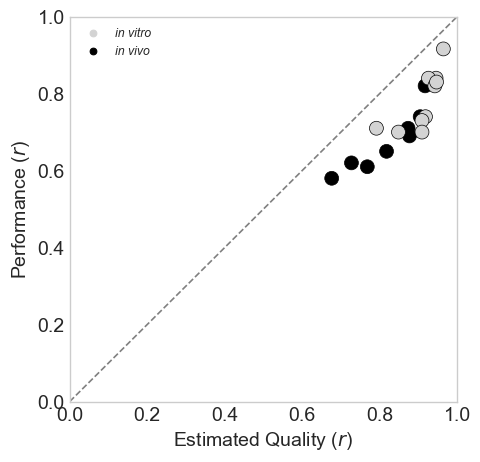

In [6]:
# [3] Plotting 

# Set the style for the plot
plt.style.use('seaborn-whitegrid')

# Create the scatter plot
plt.figure(figsize=(5, 5))

# Create a custom palette with grey and black colors
custom_palette = ['#d3d3d3', 'black']

# Use seaborn to , 'black']

# Use seaborn to plot with specified colors
sns.scatterplot(data=POP, x='Quality', y='Performance', hue='Type', 
                palette=custom_palette, s=100, edgecolor='k', linewidth=0.5)

# Customize the plot further for publication quality
plt.xlabel('Estimated Quality ($\it{r}$)', fontsize=14)
plt.ylabel('Performance ($\it{r}$)', fontsize=14)
plt.legend(loc='upper left', prop={'style': 'italic'}, fontsize=20)

# Increase tick label size
plt.tick_params(axis='both', which='major', labelsize=14)

plt.xlim([0, 1])
plt.ylim([0, 1])

# Add a line from (0, 0) to (1, 1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Correlation 
correlation, p_value = pearsonr(POP['Quality'], POP['Performance'])
#plt.text(x=0.05, y=0.80, s=f'Correlation: {correlation:.3f}, p-value: {p_value:.3g}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=12)

plt.grid(False)

# Ensure the plot is saved in high resolution
plt.savefig('results/ProteinEngieering_Quality_Performance.png', dpi=300, bbox_inches='tight')
plt.savefig('results/ProteinEngieering_Quality_Performance.svg', dpi=300, bbox_inches='tight')


plt.show()
